Importing necessary libraries

In [1]:
! pip install opencv-python

In [2]:
import cv2


In [3]:
%%cmd 
Where python


Microsoft Windows [Version 10.0.19045.3208]
(c) Microsoft Corporation. All rights reserved.

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>Where python
E:\abc\python.exe
C:\Users\LENOVO L460\AppData\Local\Programs\Python\Python39\python.exe
C:\Users\LENOVO L460\AppData\Local\Microsoft\WindowsApps\python.exe

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>

In [4]:
%%cmd
pip install face-recognition

Microsoft Windows [Version 10.0.19045.3208]
(c) Microsoft Corporation. All rights reserved.

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>pip install face-recognition

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>

In [5]:
%%cmd 
pip install cmake


Microsoft Windows [Version 10.0.19045.3208]
(c) Microsoft Corporation. All rights reserved.

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>pip install cmake

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>

In [6]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import logging
import time

E:\abc\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
%%cmd
python --version

Microsoft Windows [Version 10.0.19045.3208]
(c) Microsoft Corporation. All rights reserved.

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>python --version
Python 3.9.13

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>

In [8]:
%%cmd
pip install "C:\Users\LENOVO L460\Desktop\dlib\dlib-19.22.99-cp39-cp39-win_amd64.whl"

Microsoft Windows [Version 10.0.19045.3208]
(c) Microsoft Corporation. All rights reserved.

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>pip install "C:\Users\LENOVO L460\Desktop\dlib\dlib-19.22.99-cp39-cp39-win_amd64.whl"
Processing c:\users\lenovo l460\desktop\dlib\dlib-19.22.99-cp39-cp39-win_amd64.whl

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\LENOVO L460\\Desktop\\dlib\\dlib-19.22.99-cp39-cp39-win_amd64.whl'



In [9]:
%%cmd 
pip install face-recognition

Microsoft Windows [Version 10.0.19045.3208]
(c) Microsoft Corporation. All rights reserved.

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>pip install face-recognition

C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main>

In [10]:
!pip install cassandra-driver


In [11]:
import cassandra

In [12]:
import face_recognition

Using Pandas to read the CSV file

In [13]:
df=pd.read_csv("bmi data set.csv")

Generating the log file

In [14]:
logging.basicConfig(filename='bmi.log', level=logging.INFO, format='%(asctime)s:%(levelname)s:%(message)s')

In [15]:
from pathlib import Path as p

In [16]:
#Identifying the image name and commencing iteration from 0

def get_index_of_digit(string):
    import re
    match = re.search("\d", p(string).stem)
    return match.start(0)

Specifying the data folder

In [17]:
data_folder = "sample_faces"

In [18]:
from glob import glob
all_files = glob(data_folder+"/*")

all_jpgs = sorted([img for img in all_files if ".jpg" in img or ".jpeg" in img or "JPG" or "png" or "PNG" in img])
logging.info("Total %d photos", len(all_jpgs))
print("Total {} photos ".format(len(all_jpgs)))

Total 257 photos 


In [19]:
id_dir = [(p(images).stem[:(get_index_of_digit(p(images).stem))],images) for  images in all_jpgs ]

In [20]:
image_df = pd.DataFrame(id_dir,columns=['UID','path'])

In [21]:
data_df = image_df.merge(df)

In [22]:
data_df

,UID,path,id,name,height,weight
0,akshay,sample_faces\akshay1.jpeg,1,akshay kumar,1.78,80
1,akshay,sample_faces\akshay10.jpg,1,akshay kumar,1.78,80
2,akshay,sample_faces\akshay11.jpg,1,akshay kumar,1.78,80
3,akshay,sample_faces\akshay12.jpg,1,akshay kumar,1.78,80
4,akshay,sample_faces\akshay13.jpg,1,akshay kumar,1.78,80
...,...,...,...,...,...,...
252,vimal,sample_faces\vimal1.jpg,45,vimal,1.75,69
253,vishal,sample_faces\vishal1.jpg,35,vishal,1.80,73
254,vishnuvishal,sample_faces\vishnuvishal1.jpg,46,vishnuvishal,1.77,73
255,vjantony,sample_faces\vjantony1.jpg,49,vjantony,1.75,67


Defining the function for extracting face data

In [23]:
def my_face_encoding(image_path):
    print(image_path)
    logging.info("Getting face encoding for image %s", image_path)
    picture_of_me = face_recognition.load_image_file(image_path)
    my_face_encoding = face_recognition.face_encodings(picture_of_me)
    if not my_face_encoding:
        print("no face found !!!")
        logging.warning("No face found in image %s", image_path)
        return np.zeros(128).tolist()
    return my_face_encoding[0].tolist()

In [24]:
tot_faces = []

iteration and appending

In [25]:
for images in data_df.path:
    face_enc = my_face_encoding(images)
    tot_faces.append(face_enc)

sample_faces\akshay1.jpeg
sample_faces\akshay10.jpg
sample_faces\akshay11.jpg
sample_faces\akshay12.jpg
sample_faces\akshay13.jpg
sample_faces\akshay14.jpg
sample_faces\akshay15.jpg
sample_faces\akshay16.jpg
sample_faces\akshay17.jpg
sample_faces\akshay18.jpg
sample_faces\akshay19.jpg
sample_faces\akshay2.jpeg
no face found !!!
sample_faces\akshay20.jpg
sample_faces\akshay3.jpg
sample_faces\akshay4.jpg
sample_faces\akshay5.jpg
sample_faces\akshay6.jpg
sample_faces\akshay7.jpg
sample_faces\akshay8.jpg
sample_faces\akshay9.jpg
sample_faces\amir1.jpg
sample_faces\amir10.jpg
sample_faces\amir11.jpg
sample_faces\amir12.jpg
sample_faces\amir13.jpg
sample_faces\amir14.jpeg
sample_faces\amir15.jpg
sample_faces\amir2.jpg
sample_faces\amir3.jpg
sample_faces\amir4.jpeg
no face found !!!
sample_faces\amir5.jpg
sample_faces\amir6.PNG
sample_faces\amir7.jpeg
sample_faces\amir8.jpg
sample_faces\amir9.jpg
sample_faces\anupam2.jpg
sample_faces\anupam3.jpg
sample_faces\anupam4.jpg
sample_faces\anupam5.j

In [26]:
X = np.array(tot_faces)

In [27]:
y_height = data_df.height.values
y_weight = data_df.weight.values

splitting the dataset

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_height_train, y_height_test, y_weight_train, y_weight_test = train_test_split(X, y_height,y_weight, random_state=1)

Converting the data Type into float

In [30]:
y_height_train=y_height_train.astype(float)
y_height_test=y_height_test.astype(float)
y_weight_train=y_weight_train.astype(float)
y_weight_test=y_weight_test.astype(float)

Obtaining the shape of the training data

In [31]:
print(X_train.shape)

(192, 128)


Training the model with CNN (Convolutional Neural Network)

Developing height model

In [32]:
# Define the model architecture
model_height = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu')
    ])
model_height.compile(loss='mse', optimizer='adam',metrics=['mae'])

# Fit the model to the training data
model_height.fit(X_train, np.log(y_height_train), epochs=13, batch_size=1)

# Evaluate the model on the test data
test_loss_height_cnn,test_height_accuracy = model_height.evaluate(X_test, np.log(y_height_test))

#logging 
logging.info("model height loss : %f, mae : %f", test_loss_height_cnn,test_height_accuracy)

#printing the metrics
print('loss of height:', test_loss_height_cnn)
print('mae of height:', test_height_accuracy)

#saving the model
model_height.save('height_model.h5')





Epoch 1/13


192/192 [==============================] - 3s 8ms/step - loss: 0.0063 - mae: 0.0502
Epoch 2/13
192/192 [==============================] - 2s 8ms/step - loss: 0.0015 - mae: 0.0296
Epoch 3/13
192/192 [==============================] - 2s 9ms/step - loss: 9.7661e-04 - mae: 0.0238
Epoch 4/13
192/192 [==============================] - 2s 8ms/step - loss: 7.8666e-04 - mae: 0.0216
Epoch 5/13
192/192 [==============================] - 2s 8ms/step - loss: 6.7190e-04 - mae: 0.0208
Epoch 6/13
192/192 [==============================] - 2s 8ms/step - loss: 4.7112e-04 - mae: 0.0176
Epoch 7/13
192/192 [==============================] - 2s 8ms/step - loss: 7.5919e-04 - mae: 0.0216
Epoch 8/13
192/192 [==============================] - 2s 8ms/step - loss: 4.1614e-04 - mae: 0.0162
Epoch 9/13
192/192 [==============================] - 2s 8ms/step - loss: 3.5858e-04 - mae: 0.0154
Epoch 10/13
192/192 [==============================] - 2s 8ms/step - loss: 4.9173e-04 - mae: 0.0177
Epoch 11/13


E:\abc\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Developing weight model

In [33]:
model_weight = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu')
])

model_weight.compile(loss='mse', optimizer='adam', metrics=['mae'])

model_weight.fit(X_train, np.log(y_weight_train), epochs=13, batch_size=1)

test_loss_weight_cnn, test_weight_accuracy = model_weight.evaluate(X_test, np.log(y_weight_test))

logging.info("model weight loss : %f, mae : %f", test_loss_weight_cnn,test_weight_accuracy)
print('loss of weight:', test_loss_weight_cnn)
print('mae of weight:', test_weight_accuracy)

#saving the model
model_weight.save('weight_model.h5')


Epoch 1/13
192/192 [==============================] - 3s 5ms/step - loss: 6.5964 - mae: 1.7441
Epoch 2/13
192/192 [==============================] - 1s 5ms/step - loss: 0.0795 - mae: 0.1932
Epoch 3/13
192/192 [==============================] - 1s 5ms/step - loss: 0.0695 - mae: 0.1905
Epoch 4/13
192/192 [==============================] - 1s 5ms/step - loss: 0.0470 - mae: 0.1508
Epoch 5/13
192/192 [==============================] - 1s 5ms/step - loss: 0.0493 - mae: 0.1679
Epoch 6/13
192/192 [==============================] - 1s 5ms/step - loss: 0.0486 - mae: 0.1716
Epoch 7/13
192/192 [==============================] - 1s 5ms/step - loss: 0.0270 - mae: 0.1240
Epoch 8/13
192/192 [==============================] - 1s 5ms/step - loss: 0.0258 - mae: 0.1175
Epoch 9/13
192/192 [==============================] - 1s 5ms/step - loss: 0.0172 - mae: 0.0996
Epoch 10/13
192/192 [==============================] - 1s 5ms/step - loss: 0.0169 - mae: 0.1020
Epoch 11/13
192/192 [============================

In [34]:
#load the models

height_model = tf.keras.models.load_model('height_model.h5')
weight_model = tf.keras.models.load_model('weight_model.h5')


def predict_height_weight_BMI(input_img,height_model,weight_model):
    logging.info("Predicting height, weight, and BMI for image %s", input_img)
    start_time = time.time()
    test_array = np.expand_dims(np.array(my_face_encoding(input_img)),axis=0)
    height = np.ndarray.item(np.exp(height_model.predict(test_array)))
    weight = np.ndarray.item(np.exp(weight_model.predict(test_array)))
    bmi = weight / (height)**2
    end_time = time.time()
    runtime = end_time - start_time
    logging.info("Predicted height: %f, weight: %f, BMI: %f, runtime : %s", height, weight, bmi, runtime)
    return {'height':height,"weight":weight,"bmi":bmi,'runtime':runtime}


for code level deployment

In [35]:
from IPython.display import Image

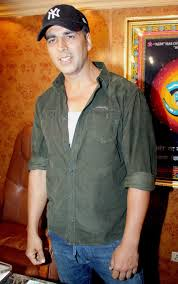

In [36]:
input_img = 'sample_faces/akshay1.jpeg'
Image(input_img)

In [37]:
predict_height_weight_BMI(input_img,height_model,weight_model)

sample_faces/akshay1.jpeg
1/1 [==============================] - 0s 141ms/step


{'height': 1.7767481803894043,
 'weight': 79.6153793334961,
 'bmi': 25.22000741861471,
 'runtime': 1.0312461853027344}

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import cv2

# Load the height, weight, and BMI models
height_model = tf.keras.models.load_model('height_model.h5')
weight_model = tf.keras.models.load_model('weight_model.h5')

# Define the function to predict height, weight, and BMI
def predict_height_weight_BMI(input_img, height_model, weight_model):
    logging.info("Predicting height, weight, and BMI for image %s", input_img)
    test_array = np.expand_dims(np.array(my_face_encoding(input_img)),axis=0)
    height = np.ndarray.item(np.exp(height_model.predict(test_array)))
    weight = np.ndarray.item(np.exp(weight_model.predict(test_array)))
    bmi = weight / (height)**2
    logging.info("Predicted height: %f, weight: %f, BMI: %f", height, weight, bmi)
    return {'height':height, "weight":weight, "bmi":bmi}

def browse_file():
    file_path = filedialog.askopenfilename()
    if file_path:
        image = Image.open(file_path)
        image = image.resize((300, 300), Image.LANCZOS)
        photo = ImageTk.PhotoImage(image)
        canvas.image = photo  # Save a reference to the image to prevent it from being garbage collected
        image_id = canvas.create_image(0, 0, anchor='nw', image=photo)  # Create image_id when loading a new image
        result = predict_height_weight_BMI(file_path, height_model, weight_model)
        result_label.config(text=f"Height: {result['height']:.2f}\nWeight: {result['weight']:.2f}\nBMI: {result['bmi']:.2f}")

def capture_image():
    cap = cv2.VideoCapture(0)
    cap.set(3, 640)
    cap.set(4, 480)

    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                cv2.imwrite('captured_image.jpg', frame)
                new_image = Image.open('captured_image.jpg')
                new_image = new_image.resize((300, 300), Image.LANCZOS)
                photo = ImageTk.PhotoImage(new_image)
                canvas.image = photo  # Save a reference to the image
                image_id = canvas.create_image(0, 0, anchor='nw', image=photo)  # Create image_id when loading a new image
                result = predict_height_weight_BMI('captured_image.jpg', height_model, weight_model)
                result_label.config(text=f"Height: {result['height']:.2f}\nWeight: {result['weight']:.2f}\nBMI: {result['bmi']:.2f}")
                break

    cap.release()
    cv2.destroyAllWindows()

def clear_display():
    canvas.delete(image_id)  # Delete the image from the canvas
    canvas.image = None  # Remove the reference to the current image
    result_label.config(text="")  # Clear the result text


root = tk.Tk()
root.title("Body Mass Index from Face Images")
root.iconbitmap(r'C:\Users\LENOVO L460\Downloads\Body-Mass-Index-from-Face-Images-main\Body-Mass-Index-from-Face-Images-main\bmi.ico')


background_image = Image.open("Capture.PNG")
background_image = background_image.resize((400, 500), Image.LANCZOS)
background_image = ImageTk.PhotoImage(background_image)
background_label = tk.Label(root, image=background_image)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

canvas_frame = tk.Frame(root, width=300, height=300)
canvas_frame.pack(pady=20)

canvas = tk.Canvas(canvas_frame, width=300, height=300)
canvas.pack()

result_frame = tk.Frame(root)
result_frame.pack(pady=10)

result_label = tk.Label(result_frame, font=("Arial", 14), bg='white')
result_label.pack()

button_frame = tk.Frame(root)
button_frame.pack(pady=10)

browse_button = tk.Button(button_frame, text="Browse the Image", command=browse_file, bg='skyblue', fg='black', relief='solid')
browse_button.pack(side=tk.LEFT, padx=10)

capture_button = tk.Button(button_frame, text="Capture Using Webcam", command=capture_image, bg='pink', fg='black', relief='solid')
capture_button.pack(side=tk.LEFT, padx=10)

clear_button = tk.Button(button_frame, text="Clear the Result", command=clear_display, bg='orange', fg='black', relief='solid')
clear_button.pack(side=tk.LEFT, padx=10)

image_id = canvas.create_image(0, 0, anchor='nw')

root.geometry("400x500")
root.resizable(False, False)  # Disable resizing
root.mainloop()



C:\Users\LENOVO L460\AppData\Local\Temp\ipykernel_11112\889180239.py:66: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  background_image = background_image.resize((400, 500), Image.LANCZOS)


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import cv2
import numpy as np
import tensorflow as tf
import logging

# Load the height, weight, and BMI models
height_model = tf.keras.models.load_model('height_model.h5')
weight_model = tf.keras.models.load_model('weight_model.h5')

# Configure logging
logging.basicConfig(level=logging.INFO)

# Define the function to predict height, weight, and BMI
def predict_height_weight_BMI(input_img, height_model, weight_model):
    logging.info("Predicting height, weight, and BMI for image %s", input_img)
    test_array = np.expand_dims(np.array(my_face_encoding(input_img)), axis=0)
    height = np.ndarray.item(np.exp(height_model.predict(test_array)))
    weight = np.ndarray.item(np.exp(weight_model.predict(test_array)))
    bmi = weight / (height)**2
    logging.info("Predicted height: %f, weight: %f, BMI: %f", height, weight, bmi)
    return {'height': height, "weight": weight, "bmi": bmi}

def browse_file():
    file_path = filedialog.askopenfilename()
    if file_path:
        image = Image.open(file_path)
        image = image.resize((300, 300), Image.LANCZOS)
        photo = ImageTk.PhotoImage(image)
        canvas.image = photo  # Save a reference to the image
        canvas.create_image(0, 0, anchor='nw', image=photo)  # Create image_id when loading a new image
        result = predict_height_weight_BMI(file_path, height_model, weight_model)
        result_label.config(text=f"Height: {result['height']:.2f}\nWeight: {result['weight']:.2f}\nBMI: {result['bmi']:.2f}")

def capture_image():
    cap = cv2.VideoCapture(0)
    cap.set(3, 640)
    cap.set(4, 480)

    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                cv2.imwrite('captured_image.jpg', frame)
                new_image = Image.open('captured_image.jpg')
                new_image = new_image.resize((300, 300), Image.LANCZOS)
                photo = ImageTk.PhotoImage(new_image)
                canvas.image = photo  # Save a reference to the image
                canvas.create_image(0, 0, anchor='nw', image=photo)  # Create image_id when loading a new image
                result = predict_height_weight_BMI('captured_image.jpg', height_model, weight_model)
                result_label.config(text=f"Height: {result['height']:.2f}\nWeight: {result['weight']:.2f}\nBMI: {result['bmi']:.2f}")
                break

    cap.release()
    cv2.destroyAllWindows()

def clear_display():
    canvas.delete(image_id)  # Delete the image from the canvas
    canvas.image = None  # Remove the reference to the current image
    result_label.config(text="")  # Clear the result text

# Create Tkinter GUI
root = tk.Tk()
root.title("Body Mass Index from Face Images")

# Add GUI components
background_image = Image.open("Capture.PNG")
background_image = background_image.resize((400, 500), Image.LANCZOS)
background_image = ImageTk.PhotoImage(background_image)
background_label = tk.Label(root, image=background_image)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

canvas_frame = tk.Frame(root, width=300, height=300)
canvas_frame.pack(pady=20)

canvas = tk.Canvas(canvas_frame, width=300, height=300)
canvas.pack()

result_frame = tk.Frame(root)
result_frame.pack(pady=10)

result_label = tk.Label(result_frame, font=("Arial", 14), bg='white')
result_label.pack()

button_frame = tk.Frame(root)
button_frame.pack(pady=10)

browse_button = tk.Button(button_frame, text="Browse the Image", command=browse_file, bg='skyblue', fg='black', relief='solid')
browse_button.pack(side=tk.LEFT, padx=10)

capture_button = tk.Button(button_frame, text="Capture Using Webcam", command=capture_image, bg='pink', fg='black', relief='solid')
capture_button.pack(side=tk.LEFT, padx=10)

clear_button = tk.Button(button_frame, text="Clear the Result", command=clear_display, bg='orange', fg='black', relief='solid')
clear_button.pack(side=tk.LEFT, padx=10)

image_id = canvas.create_image(0, 0, anchor='nw')

root.geometry("400x500")
root.resizable(False, False)  # Disable resizing

# Start the Tkinter event loop
root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import cv2
import numpy as np
import tensorflow as tf
import logging

# Load the height, weight, and BMI models
height_model = tf.keras.models.load_model('height_model.h5')
weight_model = tf.keras.models.load_model('weight_model.h5')

# Configure logging
logging.basicConfig(level=logging.INFO)

# Define the function to predict height, weight, and BMI
def predict_height_weight_BMI(input_img, height_model, weight_model):
    logging.info("Predicting height, weight, and BMI for image %s", input_img)
    test_array = np.expand_dims(np.array(my_face_encoding(input_img)), axis=0)
    height = np.ndarray.item(np.exp(height_model.predict(test_array)))
    weight = np.ndarray.item(np.exp(weight_model.predict(test_array)))
    bmi = weight / (height)**2
    logging.info("Predicted height: %f, weight: %f, BMI: %f", height, weight, bmi)
    return {'height': height, "weight": weight, "bmi": bmi}

def browse_file():
    file_path = filedialog.askopenfilename()
    if file_path:
        image = Image.open(file_path)
        image = image.resize((300, 300), Image.LANCZOS)
        photo = ImageTk.PhotoImage(image)
        canvas.image = photo  # Save a reference to the image
        canvas.create_image(0, 0, anchor='nw', image=photo)  # Create image_id when loading a new image
        result = predict_height_weight_BMI(file_path, height_model, weight_model)
        result_label.config(text=f"Height: {result['height']:.2f}\nWeight: {result['weight']:.2f}\nBMI: {result['bmi']:.2f}")

def capture_image():
    cap = cv2.VideoCapture(0)
    cap.set(3, 640)
    cap.set(4, 480)

    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                cv2.imwrite('captured_image.jpg', frame)
                new_image = Image.open('captured_image.jpg')
                new_image = new_image.resize((300, 300), Image.LANCZOS)
                photo = ImageTk.PhotoImage(new_image)
                canvas.image = photo  # Save a reference to the image
                canvas.create_image(0, 0, anchor='nw', image=photo)  # Create image_id when loading a new image
                result = predict_height_weight_BMI('captured_image.jpg', height_model, weight_model)
                result_label.config(text=f"Height: {result['height']:.2f}\nWeight: {result['weight']:.2f}\nBMI: {result['bmi']:.2f}")
                break

    cap.release()
    cv2.destroyAllWindows()

def clear_display():
    canvas.delete("all")  # Delete all items from the canvas
    canvas.image = None  # Remove the reference to the current image
    result_label.config(text="")  # Clear the result text

# Create Tkinter GUI
root = tk.Tk()
root.title("Body Mass Index from Face Images")

# Add GUI components
background_image = Image.open("Capture.PNG")
background_image = background_image.resize((400, 500), Image.LANCZOS)
background_image = ImageTk.PhotoImage(background_image)
background_label = tk.Label(root, image=background_image)
background_label.image = background_image  # Save a reference to the image
background_label.place(x=0, y=0, relwidth=1, relheight=1)

canvas_frame = tk.Frame(root, width=300, height=300)
canvas_frame.pack(pady=20)

canvas = tk.Canvas(canvas_frame, width=300, height=300)
canvas.pack()

result_frame = tk.Frame(root)
result_frame.pack(pady=10)

result_label = tk.Label(result_frame, font=("Arial", 14), bg='white')
result_label.pack()

button_frame = tk.Frame(root)
button_frame.pack(pady=10)

browse_button = tk.Button(button_frame, text="Browse the Image", command=browse_file, bg='skyblue', fg='black', relief='solid')
browse_button.pack(side=tk.LEFT, padx=10)

capture_button = tk.Button(button_frame, text="Capture Using Webcam", command=capture_image, bg='pink', fg='black', relief='solid')
capture_button.pack(side=tk.LEFT, padx=10)

clear_button = tk.Button(button_frame, text="Clear the Result", command=clear_display, bg='orange', fg='black', relief='solid')
clear_button.pack(side=tk.LEFT, padx=10)

root.geometry("400x500")
root.resizable(False, False)  # Disable resizing

# Start the Tkinter event loop
root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import cv2
import numpy as np
import tensorflow as tf
import logging

# Load the height, weight, and BMI models
height_model = tf.keras.models.load_model('height_model.h5')
weight_model = tf.keras.models.load_model('weight_model.h5')

# Configure logging
logging.basicConfig(level=logging.INFO)

# Define the function to predict height, weight, and BMI
def predict_height_weight_BMI(input_img, height_model, weight_model):
    logging.info("Predicting height, weight, and BMI for image %s", input_img)
    test_array = np.expand_dims(np.array(my_face_encoding(input_img)), axis=0)
    height = np.ndarray.item(np.exp(height_model.predict(test_array)))
    height_feet = height * 3.28084  # Convert height to feet
    weight = np.ndarray.item(np.exp(weight_model.predict(test_array)))
    
    bmi = weight / (height)**2
    logging.info("Predicted height: %f meters (%f feet), weight: %f, BMI: %f", height, weight, bmi)
    return {'height': height_feet, "weight": weight, "bmi": bmi}

def browse_file():
    file_path = filedialog.askopenfilename()
    if file_path:
        image = Image.open(file_path)
        image = image.resize((300, 300), Image.LANCZOS)
        photo = ImageTk.PhotoImage(image)
        background_label.configure(image=photo)
        background_label.image = photo  # Save a reference to the image
        result = predict_height_weight_BMI(file_path, height_model, weight_model)
        result_label.config(text=f"Height: {result['height']:.2f}\nWeight: {result['weight']:.2f}\nBMI: {result['bmi']:.2f}")

def capture_image():
    cap = cv2.VideoCapture(0)
    cap.set(3, 640)
    cap.set(4, 480)

    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                cv2.imwrite('captured_image.jpg', frame)
                new_image = Image.open('captured_image.jpg')
                new_image = new_image.resize((300, 300), Image.LANCZOS)
                photo = ImageTk.PhotoImage(new_image)
                background_label.configure(image=photo)
                background_label.image = photo  # Save a reference to the image
                result = predict_height_weight_BMI('captured_image.jpg', height_model, weight_model)
                result_label.config(text=f"Height: {result['height']:.2f}\nWeight: {result['weight']:.2f}\nBMI: {result['bmi']:.2f}")
                break

    cap.release()
    cv2.destroyAllWindows()

def clear_display():
    background_label.config(image='')  # Clear the background image
    result_label.config(text="")  # Clear the result text

# Create Tkinter GUI
root = tk.Tk()
root.title("Body Mass Index from Face Images")

# Add GUI components
background_image = Image.open("Capture.PNG")
background_image = background_image.resize((400, 500), Image.LANCZOS)
background_image = ImageTk.PhotoImage(background_image)
background_label = tk.Label(root, image=background_image)
background_label.image = background_image  # Save a reference to the image
background_label.place(x=0, y=0, relwidth=1, relheight=1)

canvas_frame = tk.Frame(root, width=300, height=300)
canvas_frame.pack(pady=20)

result_frame = tk.Frame(root)
result_frame.pack(pady=10)

result_label = tk.Label(result_frame, font=("Arial", 14), bg='white')
result_label.pack()

button_frame = tk.Frame(root)
button_frame.pack(pady=10)

browse_button = tk.Button(button_frame, text="Browse the Image", command=browse_file, bg='skyblue', fg='black', relief='solid')
browse_button.pack(side=tk.LEFT, padx=10)

capture_button = tk.Button(button_frame, text="Capture Using Webcam", command=capture_image, bg='pink', fg='black', relief='solid')
capture_button.pack(side=tk.LEFT, padx=10)

clear_button = tk.Button(button_frame, text="Clear the Result", command=clear_display, bg='orange', fg='black', relief='solid')
clear_button.pack(side=tk.LEFT, padx=10)

root.geometry("400x500")
root.resizable(False, False)  # Disable resizing

# Start the Tkinter event loop
root.mainloop()
